# Interactive Data Visualization

## **Author** : Himanshu Singhal

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from sklearn.datasets.california_housing import fetch_california_housing
from ipywidgets import interact, interactive, fixed, interact_manual

cal_housing = fetch_california_housing('.')
#print(cal_housing.DESCR)

H = cal_housing.data
avg_price = cal_housing.target
feature_names = cal_housing.feature_names
housing=pd.DataFrame(np.hstack([H,avg_price[:,np.newaxis]]),columns=np.hstack([feature_names,'price']))

In [2]:
#Divide the population by 100 to scale it down
housing['Population'] = housing['Population']/100
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,3.22,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,24.01,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,4.96,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,5.58,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,5.65,2.181467,37.85,-122.25,3.422


In [3]:
@interact (Feature = ["MedInc", "HouseAge", "price", "AveRooms",
                 "AveBedrms", "Population", "AveOccup"])

def plot(Feature):
    california_img = mpimg.imread('california.png')
    ax = housing.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(15,10),
                       s=housing[Feature], label="Feature",
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

    prices = housing['price']
    tick_values = np.linspace(prices.min(), prices.max(), 6)
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(["$%dk"%(round(v*100)) for v in tick_values], fontsize=14)
    cbar.set_label('Price', fontsize=16)

    plt.legend(fontsize=16)
    plt.figure()
    plt.show()

interactive(children=(Dropdown(description='Feature', options=('MedInc', 'HouseAge', 'price', 'AveRooms', 'Ave…

I have used the following image to create the map of california and plot each data point on it.
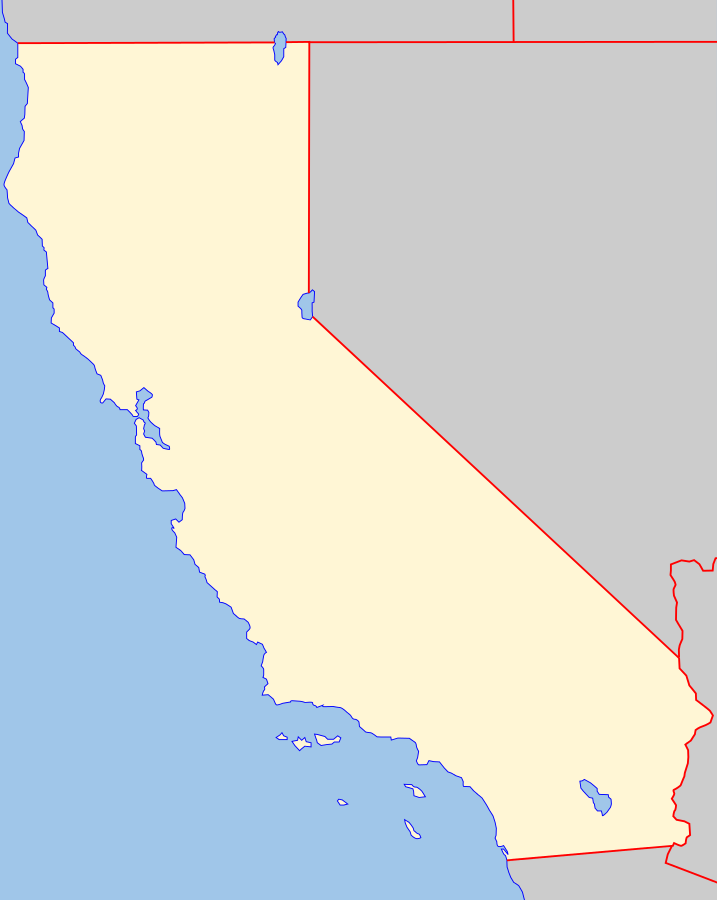
The image can be found on the link below - 
https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwj2iMutjaTlAhWFd98KHb1nDOQQjRx6BAgBEAQ&url=https%3A%2F%2Fsw.m.wikipedia.org%2Fwiki%2FPicha%3ACalifornia_blank_map.svg&psig=AOvVaw1mSf_L5GNwrVamJnQFkPjV&ust=1571429537743916

The image can be renames as 'california.png'